# 📊 Adidas USA Retail Data Analysis (Portfolio Project)
## 1️⃣ Introduction
This project analyzes **Adidas USA** retail product data to understand pricing structure, discount strategies and customer perception across product categories.
## 2️⃣ Business Questions:
This analysis seeks to answer the following questions:
1. How are Adidas products distributed across categories?
2. What is the pricing and discount structure of Adidas products?
3. How do customers perceive product across categories?
4. Does price or discounting influence customer engagement?

In [8]:
# library import
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# data import
df_original = pd.read_csv(r'C:\Users\Faggio\Documents\Python project\adidas_retail_project\csv_files\adidas_usa_raw.csv')

In [10]:
# Created a copy for analysis
df = df_original.copy()

## 3️⃣ Data Overview
The dataset used for this analysis contains retail product information for Adidas products sold in the United States.
It is a structured dataset obtained from an online source and represents historical product-level data rather than real-time streaming data.

The dataset consists of multiple rows, each representing a unique product and several columns capturing pricing, discounting and customer feedback information.

### Dataset size
* Number of rows: 845
* Number of rows: 21

In [11]:
df.shape

(845, 21)

### Column Description
* **product_name**: Name of the Adidas product.
* **category**: Various product categories offered by Adidas.
* **original_price**: Original listed price of the product before discount.
* **selling_price**: Final selling price after discount.
* **discount**: Discount Percentage applied to the product.
* **average_rating**: Average Customer rating for the product.
* **reviews_count**: Number of customer reviews, used as a proxy for engagement.

## 4️⃣  Data Cleaning and Preparation
Before further analysis, the dataset is to be cleaned and prepared to ensure consistency, accuracy and suitability for analysis. The steps involved:
1. Data Standardization.
2. Creating additional features required for pricing and discount analysis (Feature Engineering).
3. Dropping unnecessary columns from our data.
4. Data Validation.

In [12]:
df['crawled_at'] = pd.to_datetime(df['crawled_at'])
df['availability'] = df['availability'].str.lower().str.strip()

### - **Price columns Standardization**
**What problems existed?**
- Prices were stored as **strings / inconsistent formats**.
- Some values were **missing**.
- Analysis requires **numeric values**.

These were handled to avoid errors during analysis

In [13]:
# Standardizing the 'original_price' and the 'selling_price' columns for analysis
df['original_price'] = df['original_price'].str.replace('$', '', regex=False).str.strip()
df['original_price'] = pd.to_numeric(df['original_price'], errors='coerce')
df['original_price'] = df['original_price'].astype('Int64')
df['selling_price'] = df['selling_price'].astype('Int64')
df['original_price'] = df['original_price'].fillna(df['selling_price'])

### - **Dropping Unwanted Columns**
Columns not needed for our analysis are dropper to prevent our data from being too bulky.

In [14]:
# Drop all unnecessary columns for our analysis
df.drop(columns=['index', 'url', 'images', 'language'], inplace=True)

### - **Feature Engineering**
Additional **features / columns** were created to analyze discount stratrgy and pricing behaviour.

In [15]:
df['discount_amount'] = df['original_price'] - df['selling_price'] # -- this shows the amount given as discount
df['discount_percent'] = (df['discount_amount'] / df['original_price']) * 100 # -- this calculates the dicount percentage

These new variables allow analysis of discount depth and its relationship with customer engagement and ratings.

### - **Data Validation**
After cleaning, the dataset was checked to confirm correct data types and the abscence of critical missing values

In [16]:
df.isna().sum()

name                0
sku                 0
selling_price       0
original_price      0
currency            0
availability        0
color               0
category            0
source              0
source_website      0
breadcrumbs         0
description         0
brand               0
country             0
average_rating      0
reviews_count       0
crawled_at          0
discount_amount     0
discount_percent    0
dtype: int64

This now ensures that the data is set for exploratory and insight-driven analysis

## 5️⃣ Exploratory Data Analysis 📊
We undertake an EDA (exploratory Data Analysis) to help us now get **understanding** of our data

### - **Product Distribution by category**
Which categories dominate Adidas listing?

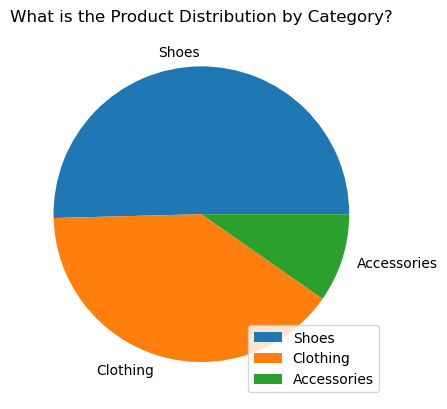

In [17]:
df['category'].value_counts().plot(kind='pie')
plt.title('What is the Product Distribution by Category?')
plt.ylabel('')
plt.legend()
plt.show()

**Insight:** The distribution shows that Adidas product offerings are concerntrated in a few major categories including core inventory areas.

### - **Price Distribution** - Are prices concerntrated or spread out?
Are Adidas products ***low-end, mid-range or premium?***

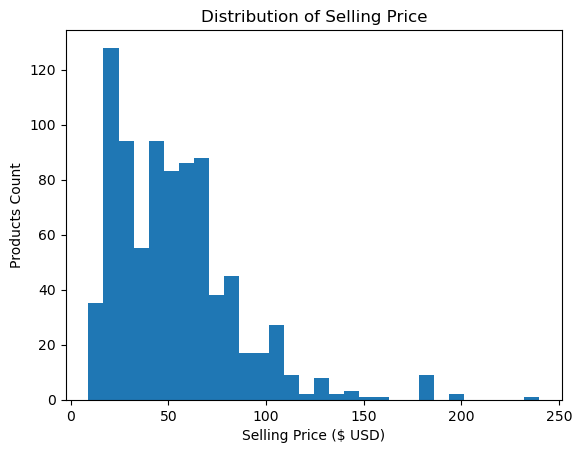

In [18]:
# Are prices concerntrated or spread out?
plt.hist(df['selling_price'], bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price ($ USD)')
plt.ylabel('Products Count')
plt.show()

**Insight:** Most products fall under the mid-price range, suggesting Adidas targets mass-market consumers rather than kuxury buyers.

### - **What is the customer satisfaction spread?**
Are customers generally satisfied or dissatisfied?

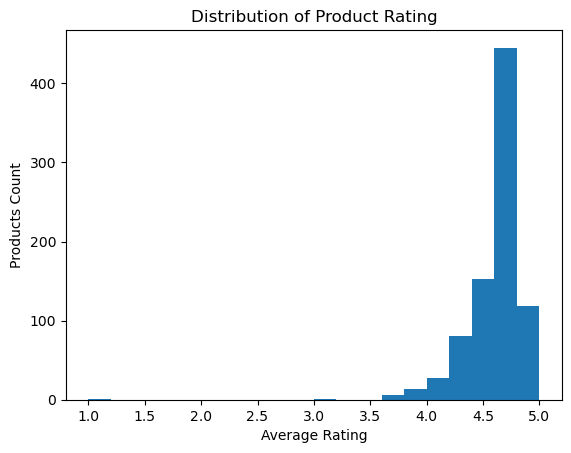

In [19]:
# What is the customer satisfaction spread?
plt.hist(df['average_rating'], bins=20)
plt.title('Distribution of Product Rating')
plt.xlabel('Average Rating')
plt.ylabel('Products Count')
plt.show()

**Insight:** The data shows that ***Ratings*** are *skewed* towards the higher end, indicating generally positive customer perception across products.

### - **Reviews count Distribution?**
Do most products receive attention or only a few?

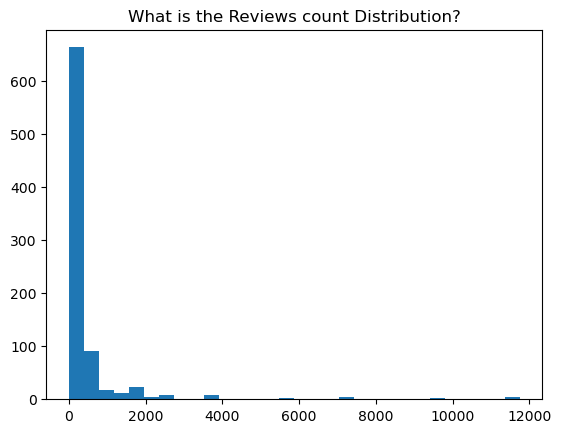

In [20]:
plt.hist(df['reviews_count'], bins=30)
plt.title('What is the Reviews count Distribution?')
plt.show()

**Insight:** Review counts are highly skewed, with a small number of products receiving a disproportionatelylarge number of reviews

### - **How do ratings vary by category?**

In [21]:
df.groupby('category')[['average_rating', 'reviews_count']].mean()

,average_rating,reviews_count
category,,
Accessories,4.825610,49.292683
Clothing,4.636202,66.810089
Shoes,4.544601,783.014085


### - **level of products availability**

In [22]:
df['availability'].value_counts() # -- What is the level of products availability?

availability
instock       842
outofstock      3
Name: count, dtype: int64

**Insight:** There's a high level of product availability

## **Discount Overview - How was discount used?**

### - **How common was discounting?**

In [23]:
# How common was discounting?
df['discounted'] = df['discount_amount'] > 0
df['discounted'].value_counts()

discounted
True     829
False     16
Name: count, dtype: Int64

Discounting appears to be a frequent strategy across product listings.

### - **Which categories are discounted more?**

In [24]:
# Which categories are discounted more?
df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)

category
Shoes          23.418842
Accessories    22.999975
Clothing       20.708251
Name: discount_percent, dtype: Float64

**Insight:** This shows that shoes were more dicounted with an average of 23%.

At this stage, exploratory analysis has provided an overview of product distribution, customer satisfaction. The next section focuses on deeper analysis to uncover relationships and strategic insights.

## 6️⃣ Insight Driven Analysis 📈

### - **Price Vs Customer Rating**
Does paying more lead to better customer satisfaction?

In [25]:
df[['selling_price', 'average_rating']].corr()

,selling_price,average_rating
selling_price,1.000000,-0.213004
average_rating,-0.213004,1.000000


see the visual below

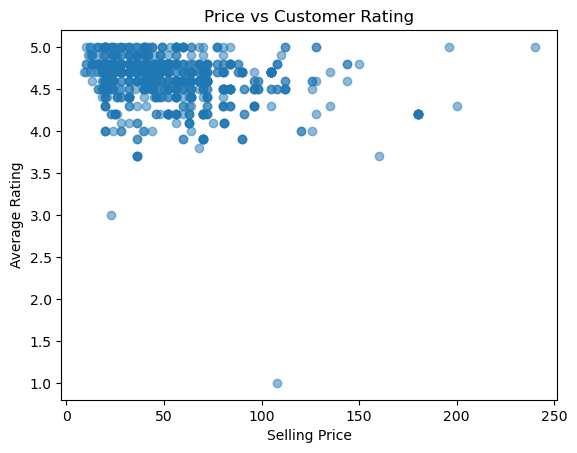

In [26]:
plt.scatter(df['selling_price'], df['average_rating'], alpha=0.5)
plt.xlabel('Selling Price')
plt.ylabel('Average Rating')
plt.title('Price vs Customer Rating')
plt.show()

**Insight:** The correlation between price and customer rating is weak, indicating that higher-priced products are not necessarily rated better. This suggests that customer satisfaction is influenced more by perceived value and product quality than price alone.

### - **Discounts and Customer Enagagement**
Do discounts drive customer engagements?

In [27]:
df.groupby('discounted')['reviews_count'].mean()

discounted
False     23.875000
True     433.943305
Name: reviews_count, dtype: float64

see visual below

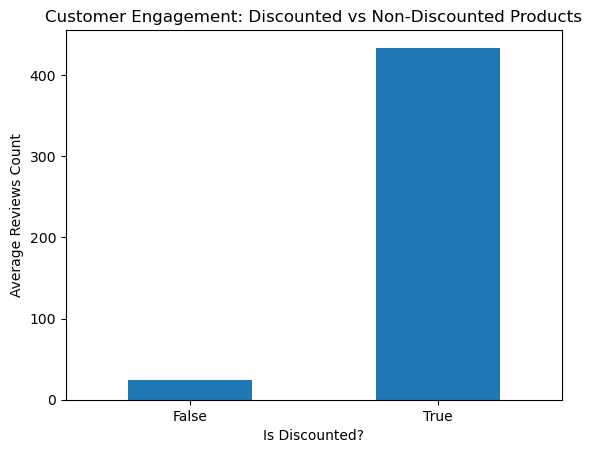

In [28]:
df.groupby('discounted')['reviews_count'].mean().plot(kind='bar')
plt.title('Customer Engagement: Discounted vs Non-Discounted Products')
plt.xlabel('Is Discounted?')
plt.ylabel('Average Reviews Count')
plt.xticks(rotation=0)
plt.show()

**Insight:** Discounted products receive higher average review counts, suggesting that price reductions increase customer interest and engagement

### - **Category Performance**
Which categories are strong and which needs attention?

In [29]:
# Category Performance
df.groupby('category')[['selling_price', 'average_rating', 'reviews_count']].mean().sort_values('selling_price', ascending=False)

,selling_price,average_rating,reviews_count
category,,,
Shoes,69.35446,4.544601,783.014085
Clothing,39.332344,4.636202,66.810089
Accessories,26.195122,4.825610,49.292683


**Insight**: Certain categories combine high pricing with strong ratings and engagements, indicating strong performance. Others show high prices but weaker engagement, suggesting a need for pricing or product review

### - **Average Selling price by category**
What is the average selling price based on category?

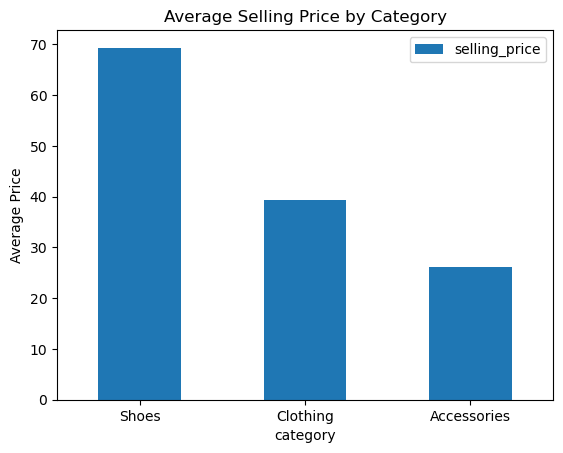

In [30]:
df.groupby('category')[['selling_price']].mean().sort_values('selling_price', ascending=False).plot(kind='bar')
plt.title('Average Selling Price by Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

**Insight**: This shows that the shoes section sells more on average compared to the other categories. This shows a high level market to be leveraged upon.

The analsyis above highlights key relationships between pricing, discounts, customer and category performance. The following section summarizes the main insights and provides business recommendations.

## 🔑 Key Insights
1. **Customer Satisfaction Is Generally High but Uneven Across Categories**

    - Most Adidas products receive strong average ratings, indicating overall customer satisfaction.

    - However, engagement levels (reviews count) vary significantly by category.

    - This suggests that while customers are satisfied, some categories attract more attention and interaction than others.

2. **Higher Price Does Not Guarantee Higher Ratings**

    - The relationship between selling price and customer ratings is weak.

    - Expensive products are not consistently rated higher than mid- or low-priced products.

    - This implies that customers value perceived quality and value, not just price.

3. **Discounts Increase Customer Engagement**

    - Products with discounts tend to have higher average review counts.

    - This indicates that discounts boost visibility and customer interaction, even if they don’t always increase ratings.

    - Discounts appear to function more as an engagement and traffic driver than a quality signal.

4. **Category Performance Varies Significantly**

    Some categories combine:

    - High average ratings

    - Strong customer engagement

    - Competitive pricing

    - Other categories show good ratings but low engagement, suggesting weaker demand or visibility issues.

    - Category performance is not uniform, meaning a one-size-fits-all strategy would be ineffective.

5. **Mid-Priced Products Often Deliver Strong Value**

    - Products in the mid-price range frequently show:

    - Strong ratings

    - High engagement

    - This suggests customers perceive these products as offering the best balance between price and quality.

##  🏁 Executive Summary
This analysis examined Adidas retail product data to understand pricing patterns, discount strategies, customer satisfaction and categories performance.
The findings show that customer satisfaction is generally high but engagement varies across categories and higher prices do not necessarily lead to better ratings. Discount play a stronger role in driving customer engagement than influencing perceived quality.

Based on these insights, Adidas can benefit from adopting category specific pricing strategies using discounts strategically to boost engagement and positioning mid priced product as strong value offerings. Overall, this project demonstrates how data-driven analysis can support smarter pricing, marketing and product positioning decisions in retail.